<a href="https://colab.research.google.com/github/ad5454/AdultIncome/blob/main/Adult_Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
project01=pd.read_csv("https://raw.githubusercontent.com/ad5454/AdultIncome/main/adult.csv")

In [ ]:
project01.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
### Creating x and y (features and lables)
x = project01.drop("income",axis=1)
y= project01["income"]

In [ ]:
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [ ]:
x1 = pd.get_dummies(x)
x1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
tf.shape(x1)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([48842,   108], dtype=int32)>

In [ ]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [ ]:
y1 = pd.get_dummies(y)
y1.head()
     

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
tf.shape(y1)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([48842,     2], dtype=int32)>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,
                                                     y1,
                                                     test_size=0.2,
                                                     random_state=42)

In [ ]:
len(x),len(x_train),len(x_test)

(48842, 39073, 9769)

In [ ]:
len(y),len(y_train),len(y_test)

(48842, 39073, 9769)

Model_1

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


history = model_1.fit(x_train,y_train,epochs=10)

Epoch 1/10
1222/1222 [==============================] - 3s 2ms/step - loss: 1469.6571 - accuracy: 0.6390
Epoch 2/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5481 - accuracy: 0.7692
Epoch 3/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5416 - accuracy: 0.7683
Epoch 4/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5409 - accuracy: 0.7712
Epoch 5/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.4961 - accuracy: 0.7967
Epoch 6/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.4946 - accuracy: 0.7973
Epoch 7/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5047 - accuracy: 0.7924
Epoch 8/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5028 - accuracy: 0.7920
Epoch 9/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5177 - accuracy: 0.7870
Epoch 10/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.

In [ ]:
model_1.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7798


[0.5314266085624695, 0.7798137068748474]

Text(0.5, 1.0, 'Model_1 training curves')

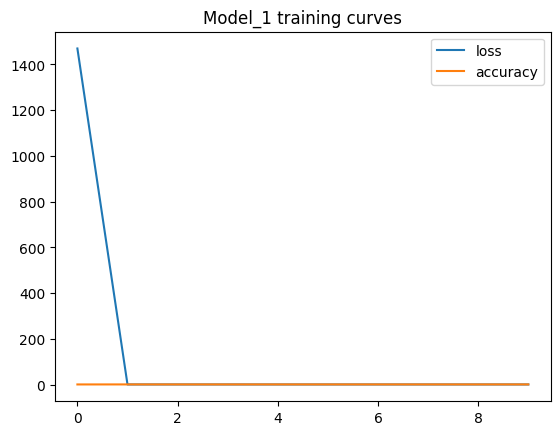

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")

Model_2

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1222/1222 [==============================] - 7s 3ms/step - loss: 0.6057 - accuracy: 0.7595
Epoch 2/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5547 - accuracy: 0.7595
Epoch 3/10
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 4/10
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 5/10
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 6/10
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 7/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 4s 4ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.551

In [ ]:
model_2.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7656


[0.5447059273719788, 0.7655850052833557]

Text(0.5, 1.0, 'Model_2 training curves')

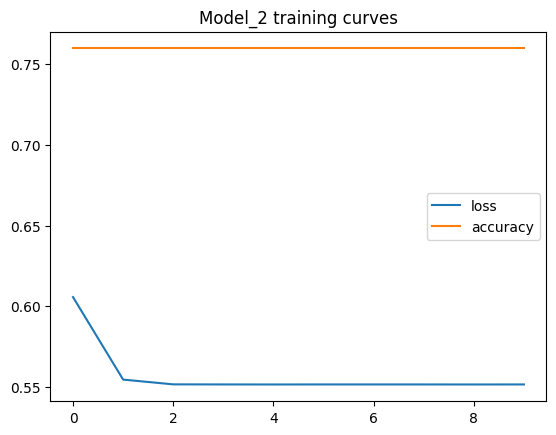

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")

Model_3

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_3.fit(x_train,y_train,epochs=10)

Epoch 1/10
1222/1222 [==============================] - 8s 6ms/step - loss: 14.4820 - accuracy: 0.7489
Epoch 2/10
1222/1222 [==============================] - 8s 7ms/step - loss: 0.5556 - accuracy: 0.7595
Epoch 3/10
1222/1222 [==============================] - 8s 6ms/step - loss: 0.5518 - accuracy: 0.7595
Epoch 4/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 5/10
1222/1222 [==============================] - 8s 7ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 6/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 7/10
1222/1222 [==============================] - 8s 7ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/10
1222/1222 [==============================] - 8s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/10
1222/1222 [==============================] - 8s 7ms/step - loss: 0.55

In [ ]:
model_3.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7656


[0.5447059273719788, 0.7655850052833557]

Text(0.5, 1.0, 'Model_3 training curves')

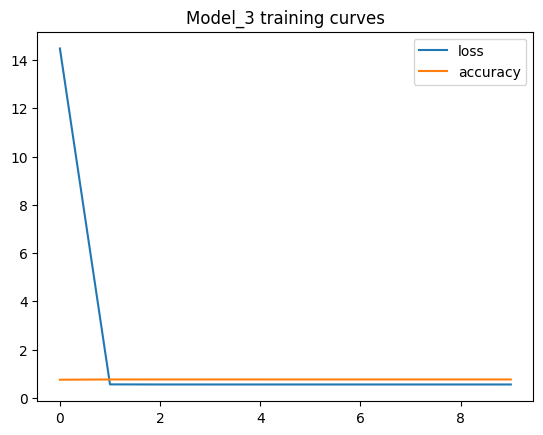

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_3 training curves")

Model_4

In [ ]:
tf.random.set_seed(42)

# Create the model (same as model_1)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(x_train, y_train, epochs=10)

Epoch 1/10
1222/1222 [==============================] - 4s 3ms/step - loss: 188.8528 - accuracy: 0.7046
Epoch 2/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5727 - accuracy: 0.7595
Epoch 3/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7595
Epoch 4/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 5/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 6/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 7/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5

In [ ]:
model_4.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7656


[0.5447058081626892, 0.7655850052833557]

Text(0.5, 1.0, 'Model_4 training curves')

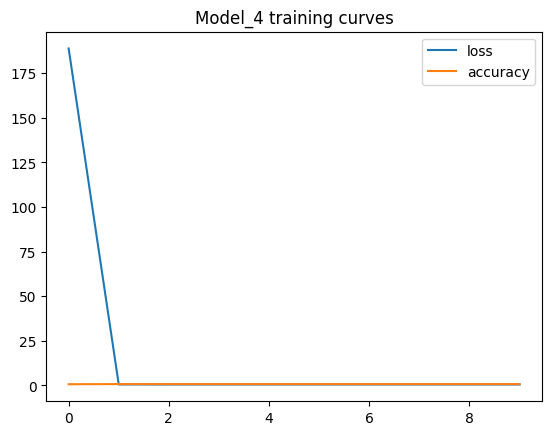

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

Model_5

In [ ]:
tf.random.set_seed(42)

# Create the model (same as model_3)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(x_train, y_train, epochs=10)

Epoch 1/10
1222/1222 [==============================] - 8s 6ms/step - loss: 217.9671 - accuracy: 0.7058
Epoch 2/10
1222/1222 [==============================] - 7s 6ms/step - loss: 62.6633 - accuracy: 0.6830
Epoch 3/10
1222/1222 [==============================] - 8s 6ms/step - loss: 13.3621 - accuracy: 0.7191
Epoch 4/10
1222/1222 [==============================] - 7s 5ms/step - loss: 0.6012 - accuracy: 0.7626
Epoch 5/10
1222/1222 [==============================] - 8s 6ms/step - loss: 0.5535 - accuracy: 0.7595
Epoch 6/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 7/10
1222/1222 [==============================] - 8s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/10
1222/1222 [==============================] - 7s 6ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/10
1222/1222 [==============================] - 8s 6ms/step - loss: 0

In [ ]:
model_5.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7656


[0.5447052717208862, 0.7655850052833557]

Text(0.5, 1.0, 'Model_5 training curves')

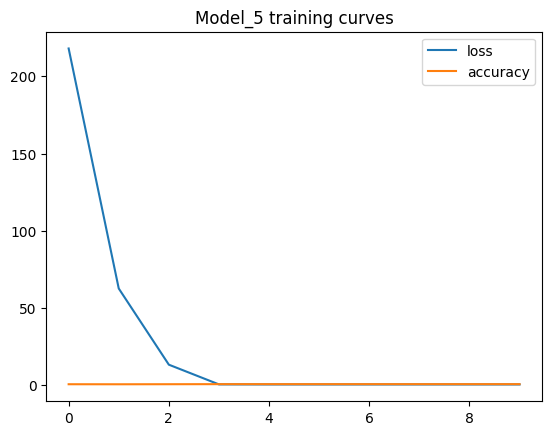

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_5 training curves")

Model_6

In [ ]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"), 
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") 
])


model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])


history = model_6.fit(x_train, y_train, epochs=10)

Epoch 1/10
1222/1222 [==============================] - 4s 2ms/step - loss: 40.0033 - accuracy: 0.7473
Epoch 2/10
1222/1222 [==============================] - 2s 2ms/step - loss: 14.0498 - accuracy: 0.7595
Epoch 3/10
1222/1222 [==============================] - 2s 2ms/step - loss: 13.9598 - accuracy: 0.7737
Epoch 4/10
1222/1222 [==============================] - 2s 2ms/step - loss: 13.6538 - accuracy: 0.7694
Epoch 5/10
1222/1222 [==============================] - 3s 3ms/step - loss: 12.6478 - accuracy: 0.7609
Epoch 6/10
1222/1222 [==============================] - 2s 2ms/step - loss: 13.1784 - accuracy: 0.7635
Epoch 7/10
1222/1222 [==============================] - 2s 2ms/step - loss: 12.3734 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 2s 2ms/step - loss: 11.6845 - accuracy: 0.7708
Epoch 9/10
1222/1222 [==============================] - 2s 2ms/step - loss: 10.0059 - accuracy: 0.7691
Epoch 10/10
1222/1222 [==============================] - 3s 2ms/step - lo

In [ ]:
model_6.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 7.3826 - accuracy: 0.8006


[7.382596492767334, 0.8005937337875366]

Text(0.5, 1.0, 'Model_6 training curves')

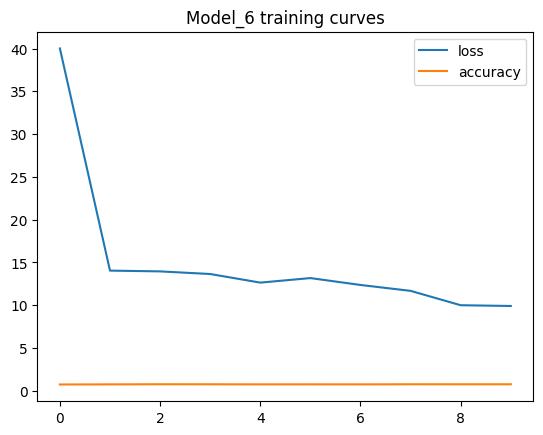

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_6 training curves")

Model_7

In [ ]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation="relu"), 
   tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])  


model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                metrics=['accuracy'])


history = model_7.fit(x_train, y_train, epochs=10)

Epoch 1/10
1222/1222 [==============================] - 3s 2ms/step - loss: 13.9981 - accuracy: 0.7581
Epoch 2/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7595
Epoch 3/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7595
Epoch 4/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5532 - accuracy: 0.7595
Epoch 5/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5529 - accuracy: 0.7595
Epoch 6/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7595
Epoch 7/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7595
Epoch 8/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5527 - accuracy: 0.7595
Epoch 9/10
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5525 - accuracy: 0.7595
Epoch 10/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.55

In [ ]:
model_7.evaluate(x_test,y_test)

306/306 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7656


[0.5445758700370789, 0.7655850052833557]

Text(0.5, 1.0, 'Model_7 training curves')

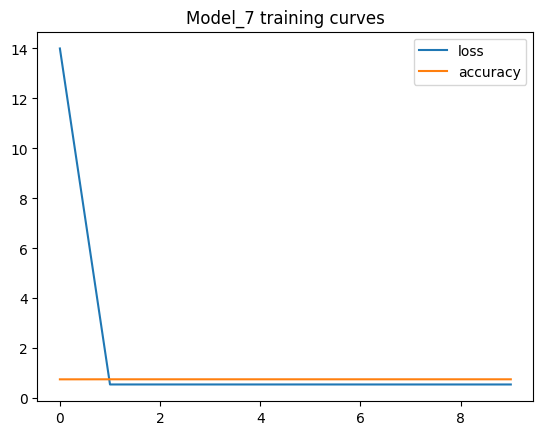

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

Model_8

In [ ]:
tf.random.set_seed(42)


model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") 
])


model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])


history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
1222/1222 [==============================] - 3s 2ms/step - loss: 102.0356 - accuracy: 0.7315
Epoch 2/25
1222/1222 [==============================] - 3s 2ms/step - loss: 78.4064 - accuracy: 0.7437
Epoch 3/25
1222/1222 [==============================] - 3s 3ms/step - loss: 69.5858 - accuracy: 0.7540
Epoch 4/25
1222/1222 [==============================] - 3s 2ms/step - loss: 51.8518 - accuracy: 0.7533
Epoch 5/25
1222/1222 [==============================] - 2s 2ms/step - loss: 49.0979 - accuracy: 0.7565
Epoch 6/25
1222/1222 [==============================] - 2s 2ms/step - loss: 41.4071 - accuracy: 0.7506
Epoch 7/25
1222/1222 [==============================] - 3s 2ms/step - loss: 39.4871 - accuracy: 0.7676
Epoch 8/25
1222/1222 [==============================] - 3s 3ms/step - loss: 33.3320 - accuracy: 0.7466
Epoch 9/25
1222/1222 [==============================] - 3s 2ms/step - loss: 28.6177 - accuracy: 0.7454
Epoch 10/25
1222/1222 [==============================] - 2s 2ms/step - l

In [ ]:
model_8.evaluate(x_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7660


[0.5440365076065063, 0.7659944891929626]

Text(0.5, 1.0, 'Model_8 training curves')

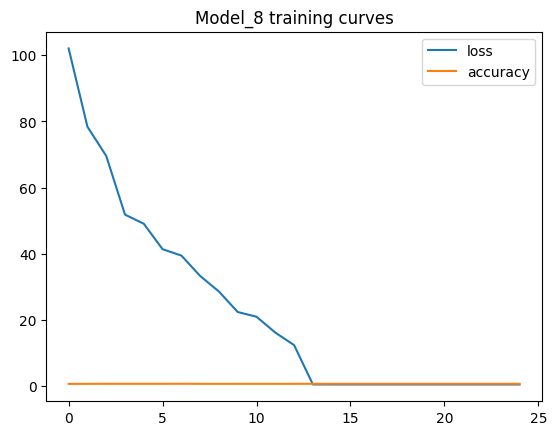

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Model_9

In [ ]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(x_train, 
                      y_train, 
                      epochs=50,
                      callbacks=[lr_scheduler])

Epoch 1/50
1222/1222 [==============================] - 3s 2ms/step - loss: 57.1195 - accuracy: 0.6572 - lr: 1.0000e-04
Epoch 2/50
1222/1222 [==============================] - 2s 2ms/step - loss: 0.6981 - accuracy: 0.7591 - lr: 1.1220e-04
Epoch 3/50
1222/1222 [==============================] - 2s 2ms/step - loss: 0.6475 - accuracy: 0.7596 - lr: 1.2589e-04
Epoch 4/50
1222/1222 [==============================] - 2s 2ms/step - loss: 0.6153 - accuracy: 0.7597 - lr: 1.4125e-04
Epoch 5/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5919 - accuracy: 0.7595 - lr: 1.5849e-04
Epoch 6/50
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5748 - accuracy: 0.7595 - lr: 1.7783e-04
Epoch 7/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5631 - accuracy: 0.7595 - lr: 1.9953e-04
Epoch 8/50
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5563 - accuracy: 0.7595 - lr: 2.2387e-04
Epoch 9/50
1222/1222 [=========================

In [90]:
model_9.evaluate(x_test,y_test)

306/306 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7656


[0.5450489521026611, 0.7655850052833557]

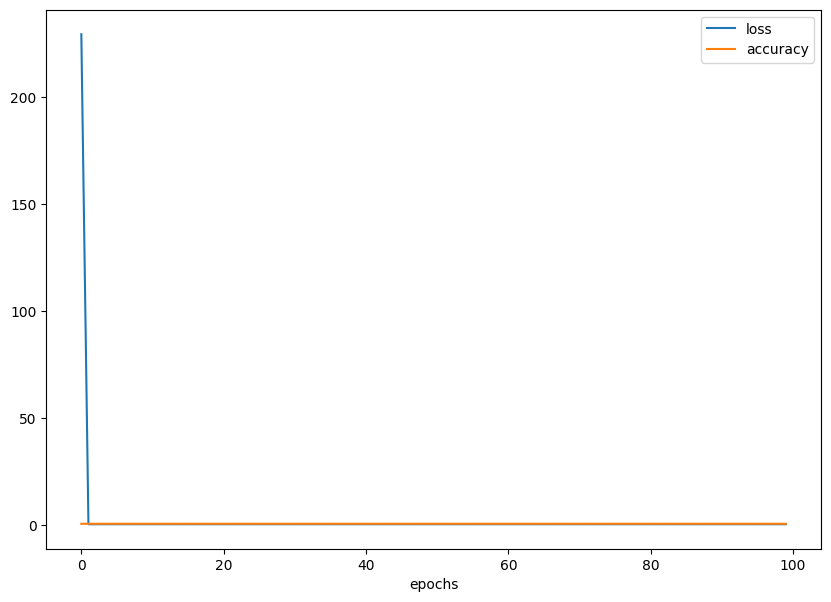

In [91]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Best_Model(model_6)

In [92]:
loss, accuracy = model_6.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

306/306 [==============================] - 1s 2ms/step - loss: 7.3826 - accuracy: 0.8006
Model loss on test set: 7.382596492767334
Model accuracy on test set: 80.06%


In [94]:
# View the first 10 predictions
y_preds[:10]

array([[9.9999827e-01, 1.6283201e-06],
       [9.9999994e-01, 9.3971837e-22],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 2.5753686e-35],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 7.9003490e-28],
       [9.9999994e-01, 6.0635801e-13],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 3.1661178e-18]], dtype=float32)

In [95]:
# View the first 10 test labels
y_test[:10]

,<=50K,>50K
7762,1,0
23881,1,0
30507,0,1
28911,1,0
19484,1,0
43031,1,0
28188,1,0
12761,0,1
40834,1,0
27875,1,0
